# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')

# iloc - integer location
# .iloc[:, :-1] - Chọn tất cả các dòng (:) và tất cả các cột trừ cột cuối cùng (:-1)
# .values - Trả về kết quả dưới dạng một NumPy mảng (array) thay vì DataFrame.
X = dataset.iloc[:, :-1].values

# iloc[:, -1] - Lấy cột cuối cùng của toàn bộ dataset dưới dạng mảng NumPy, thường dùng để lấy nhãn đầu ra (label) trong bài toán học máy (machine learning)
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [4]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [ ]:
# impute: quy ước
# SimpleImputer: SimpleImputer là một bộ xử lý dữ liệu bị thiếu (missing values) trong thư viện scikit-learn, giúp bạn tự động điền (impute) các giá trị bị thiếu trong tập dữ liệu — thường là NaN.
from sklearn.impute import SimpleImputer

# strategy='mean': dùng trung bình cộng để replace, ngoài ra còn có median, most_frequent, constant
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# X[:, 1:3] là cách lấy tất cả các dòng và các cột thứ 1 và 2 (theo chỉ số bắt đầu từ 0) của mảng X
# .fit(X[:, 1:3]) sẽ "học" (tính toán) các thông số cần thiết của mảng X
# Trong Python, cú pháp a:b sẽ lấy từ chỉ số a đến b-1
imputer.fit(X[:, 1:3])

# .transform - áp dụng phương pháp biến đổi (thường là điền giá trị thiếu) lên các cột này.
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [19]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

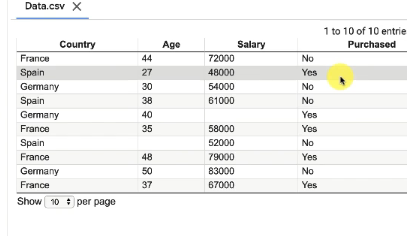

Các Country như France, Spain, Germany xuất hiện nhiều lần, bọn này gom lại thành 1 category

-> Biến đổi bọn nó thành vector, France(1,0,0), Spain(0,1,0), Germany(0,0,1) 

In [ ]:
# ColumnTransformer dùng để áp dụng các phép biến đổi (transformations) khác nhau lên các cột khác nhau của dữ liệu đầu vào.
from sklearn.compose import ColumnTransformer

# OneHotEncoder dùng để chuyển đổi các biến phân loại (categorical variables) thành dạng số (numeric dạng ma trận) bằng cách mã hóa one-hot
# One-hot (dịch sát nghĩa là "một-nóng") là một cách biểu diễn dữ liệu, trong đó chỉ có một phần tử có giá trị 1 (nóng), còn lại đều là 0. Cách này thường dùng để mã hóa các giá trị phân loại (categorical) thành dạng số.
from sklearn.preprocessing import OneHotEncoder

"""
ColumnTransformer: Cho phép áp dụng các phép biến đổi khác nhau lên các cột khác nhau.
transformers=[('encoder', OneHotEncoder(), [0])]:
  'encoder': Tên của phép biến đổi.
  OneHotEncoder(): Sử dụng bộ mã hóa one-hot cho dữ liệu phân loại.
  [0]: Áp dụng OneHotEncoder cho cột có chỉ số 0 (cột đầu tiên), cụ thể theo ví dụ trên là cột "Country".
remainder='passthrough': Các cột không được liệt kê trong transformers (tức là các cột còn lại) sẽ được giữ nguyên (không biến đổi).
"""
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])], 
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))

In [32]:
print(X)

[[0.0 1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [0]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [0]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [0]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [0]:
print(y_test)

[0 1]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [0]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
